In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\\Users\\sravi\Downloads\\Ravi Data Science\\End to end project\\gempriceprediction\\gemprice\\cubic_zirconia.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [5]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [9]:
data=data.drop(labels=["Unnamed: 0"],axis=1)

In [10]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
data.duplicated().sum()

34

In [12]:
#FILLING NULL VALUES

In [14]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


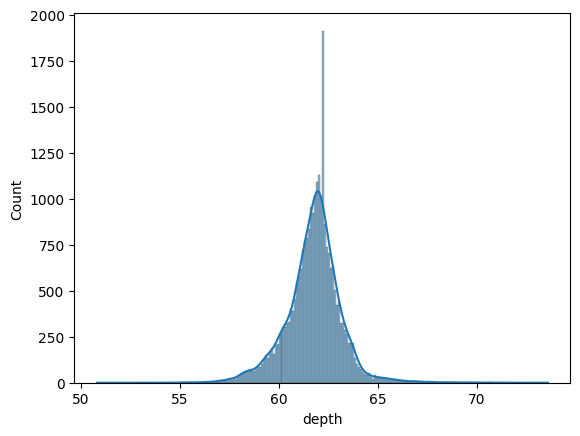

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

sns.histplot(data=data,x="depth",kde=True)
plt.show()

<Axes: xlabel='depth', ylabel='price'>

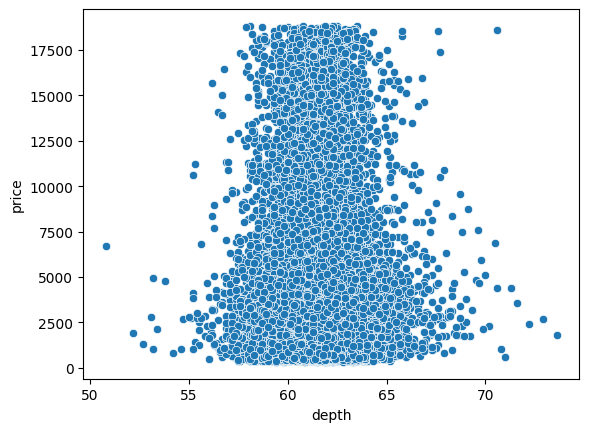

In [16]:
sns.scatterplot(x=data['depth'], y=data['price'])

In [17]:
depth_mean = data["depth"].mean()
depth_mean

61.74514655500572

In [18]:
depth_median = data["depth"].median()
depth_median

61.8

In [19]:
data["depth"].fillna(depth_mean,inplace=True)

In [20]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [21]:
data.duplicated().sum()

34

In [22]:
data.drop_duplicates(data,inplace=True)

In [23]:
data.duplicated().sum()

0

In [24]:
# cat and num columns

categorical_columns=data.columns[data.dtypes=="object"]

In [25]:
numerical_columns=data.columns[data.dtypes!="object"]

In [26]:
data[categorical_columns].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [27]:
data[categorical_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [28]:
data[categorical_columns]["cut"].value_counts()

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64

In [29]:
data[categorical_columns]["color"].value_counts()

color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64

In [30]:
data[categorical_columns]['clarity'].value_counts()

clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: count, dtype: int64

In [31]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.745282,1.393848,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


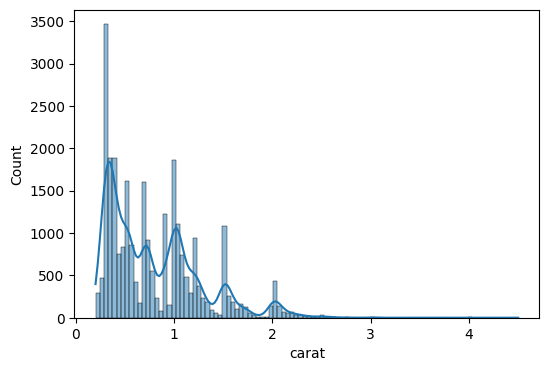

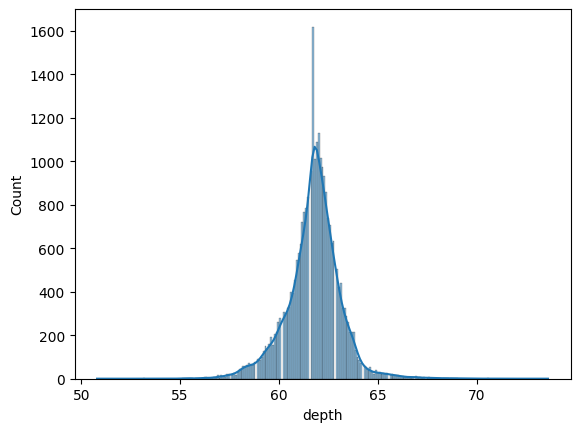

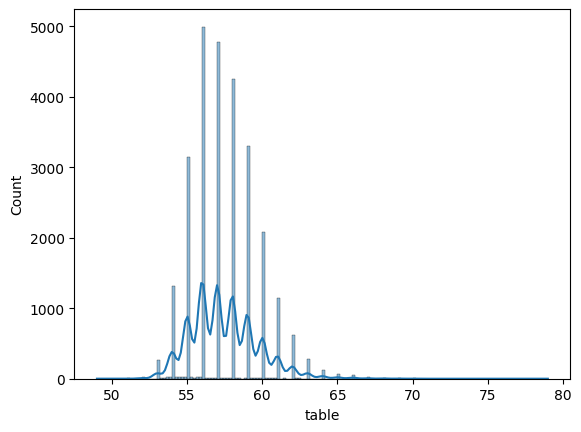

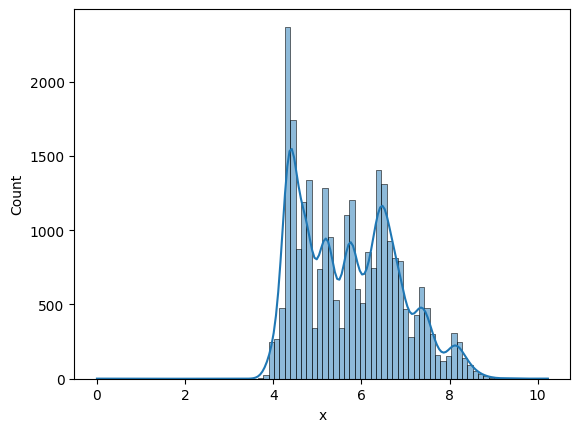

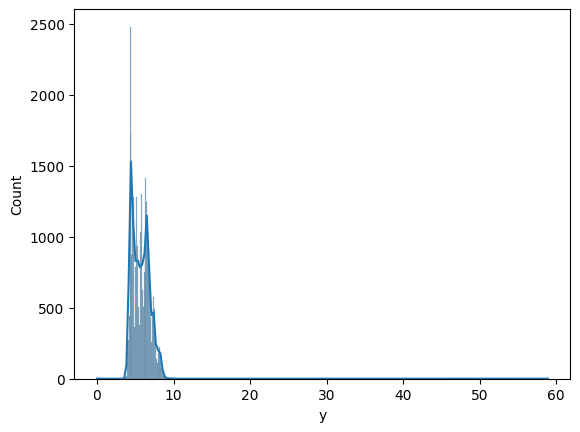

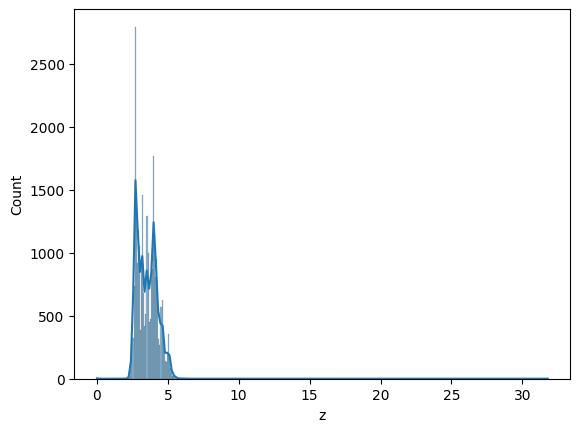

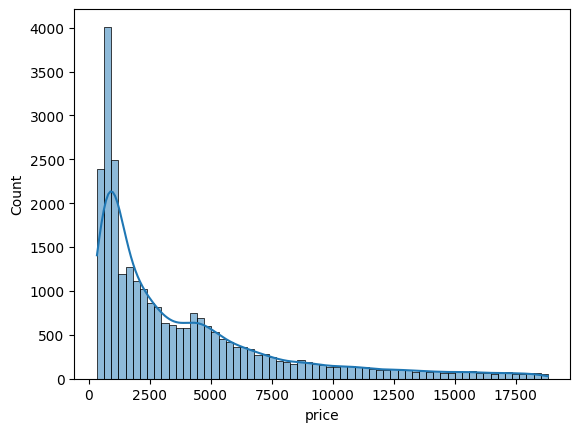

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

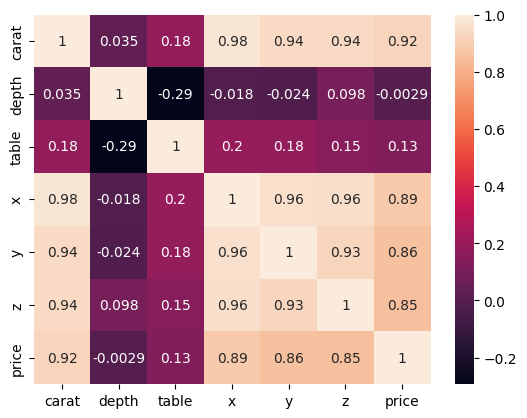

In [33]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [34]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [35]:
# encoding

data["clarity"].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [36]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [37]:
data["color"].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [38]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [39]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [41]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,4,3,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,5,8,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,4,2,4,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,3,6,61.8,56.0,4.19,4.20,2.60,682


In [42]:
X=data.drop(labels=["price"],axis=1)

In [43]:
y=data[["price"]]

In [44]:
categorical_cols=X.select_dtypes(include='object').columns

In [45]:
numerical_cols=X.select_dtypes(exclude='object').columns

In [46]:
numerical_cols

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [47]:
X.select_dtypes(include='object')

""
0
1
2
3
4
...
26962
26963
26964
26965


In [48]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [49]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [50]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [51]:
cat_pipeline=Pipeline(
    
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
    
)

In [52]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [53]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [54]:
preprocessor.fit_transform(X_train)

array([[ 2.57516974,  0.97886018,  0.80992011, ...,  2.1367904 ,
         2.11500355,  2.04447991],
       [-0.87815872,  0.97886018, -0.36158701, ..., -0.92593863,
        -0.98776155, -0.89271951],
       [-0.8363002 , -0.81728084, -1.53309413, ..., -0.8637963 ,
        -0.81786952, -0.87899428],
       ...,
       [ 0.46131414,  0.97886018, -1.53309413, ...,  0.66312948,
         0.62174196,  0.63078113],
       [-1.04559283, -1.71535136, -1.53309413, ..., -1.35205745,
        -1.33648731, -1.19467459],
       [-1.04559283,  0.97886018,  0.80992011, ..., -1.28991513,
        -1.32754563, -1.19467459]])

In [55]:
preprocessor.transform(X_test)

array([[ 0.81711161,  0.97886018,  0.22416655, ...,  0.91169879,
         0.96152603,  0.94646144],
       [-0.92001725, -0.81728084, -0.94734057, ..., -1.07685571,
        -1.04141167, -0.9338952 ],
       [ 1.59149436, -1.71535136,  1.98142723, ...,  1.4887347 ,
         1.45331877,  1.45429498],
       ...,
       [-0.94094651, -0.81728084, -0.94734057, ..., -1.09461067,
        -1.0861201 , -1.00252136],
       [ 0.54503119, -0.81728084,  0.80992011, ...,  0.63649705,
         0.71115882,  0.68568205],
       [-0.58514903,  0.08078967, -0.94734057, ..., -0.49094233,
        -0.52279387, -0.42606166]])

In [56]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__cut', 'num_pipeline__color',
       'num_pipeline__clarity', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z'], dtype=object)

In [57]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [58]:
X_train

,num_pipeline__carat,num_pipeline__cut,num_pipeline__color,num_pipeline__clarity,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z
0,2.575170,0.978860,0.809920,-1.242394,0.107590,-0.200453,2.136790,2.115004,2.044480
1,-0.878159,0.978860,-0.361587,-0.029152,0.107590,-1.102041,-0.925939,-0.987762,-0.892720
2,-0.836300,-0.817281,-1.533094,-0.029152,-0.897315,0.250341,-0.863796,-0.817870,-0.878994
3,1.507777,0.080790,-0.947341,-0.635773,0.538264,0.701135,1.417715,1.363902,1.399394
4,0.419456,-2.613422,0.809920,-1.242394,4.342549,-2.003629,0.308030,0.255133,0.768033
...,...,...,...,...,...,...,...,...,...
18848,-0.187493,0.080790,0.224167,-0.635773,-2.045778,2.053517,0.103849,0.049474,-0.151557
18849,-0.627008,0.978860,1.395674,1.184091,-0.897315,-0.200453,-0.526452,-0.504911,-0.577039
18850,0.461314,0.978860,-1.533094,1.184091,0.179369,-0.651247,0.663129,0.621742,0.630781
18851,-1.045593,-1.715351,-1.533094,-1.242394,1.040717,-0.200453,-1.352057,-1.336487,-1.194675


In [59]:
X_test

,num_pipeline__carat,num_pipeline__cut,num_pipeline__color,num_pipeline__clarity,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z
0,0.817112,0.978860,0.224167,-0.635773,0.394706,-1.102041,0.911699,0.961526,0.946461
1,-0.920017,-0.817281,-0.947341,-0.635773,0.825380,-0.651247,-1.076856,-1.041412,-0.933895
2,1.591494,-1.715351,1.981427,-0.029152,0.394706,2.955105,1.488735,1.453319,1.454295
3,-0.836300,0.080790,-0.361587,0.577469,-0.897315,1.151929,-0.863796,-0.835753,-0.892720
4,0.565960,0.080790,0.809920,-0.029152,-2.045778,0.250341,0.858434,0.818459,0.534705
...,...,...,...,...,...,...,...,...,...
8075,1.486848,0.080790,-0.361587,-0.635773,-0.610199,1.602723,1.408837,1.399669,1.248417
8076,-0.103776,-1.715351,-0.361587,0.577469,1.902064,0.701135,-0.055946,-0.013118,0.164123
8077,-0.940947,-0.817281,-0.947341,0.577469,0.394706,1.151929,-1.094611,-1.086120,-1.002521
8078,0.545031,-0.817281,0.809920,-0.635773,0.322927,0.250341,0.636497,0.711159,0.685682


In [60]:
"""linear regression
ridge regression
lasso regression
elastic net"""

'linear regression\nridge regression\nlasso regression\nelastic net'

In [61]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}

In [64]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [65]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

In [66]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()


In [67]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet'])

In [68]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), ElasticNet()])

In [69]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    #this is a validation(test) score
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 1473.1030911396165
MAE: 820.6695441677324
R2 score 86.82979623458968


Lasso
Model Training Performance
RMSE: 1305.08539329326
MAE: 817.2855616389311
R2 score 89.66277258611896


Ridge
Model Training Performance
RMSE: 1453.674928340043
MAE: 820.4494118520015
R2 score 87.17489843737404


Elasticnet
Model Training Performance
RMSE: 1676.0714723113188
MAE: 1085.4714176124771
R2 score 82.95051437635597




c:\Users\sravi\.conda\envs\gemdvc\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+08, tolerance: 3.027e+07
  model = cd_fast.enet_coordinate_descent(


In [70]:
trained_model_list

[]

In [71]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

In [72]:
r2_list

[0.8682979623458968,
 0.8966277258611897,
 0.8717489843737404,
 0.8295051437635597]